In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
df = pd.read_csv('auto-mpg.csv')

## Understanding the data

In [65]:
print(df.head()) #checking columns & data-type

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


In [67]:
print(df.info()) #checking column types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB
None


In [69]:
print(df.describe()) #stat summary

              mpg   cylinders  displacement       weight  acceleration  \
count  398.000000  398.000000    398.000000   398.000000    398.000000   
mean    23.514573    5.454774    193.425879  2970.424623     15.568090   
std      7.815984    1.701004    104.269838   846.841774      2.757689   
min      9.000000    3.000000     68.000000  1613.000000      8.000000   
25%     17.500000    4.000000    104.250000  2223.750000     13.825000   
50%     23.000000    4.000000    148.500000  2803.500000     15.500000   
75%     29.000000    8.000000    262.000000  3608.000000     17.175000   
max     46.600000    8.000000    455.000000  5140.000000     24.800000   

       model year      origin  
count  398.000000  398.000000  
mean    76.010050    1.572864  
std      3.697627    0.802055  
min     70.000000    1.000000  
25%     73.000000    1.000000  
50%     76.000000    1.000000  
75%     79.000000    2.000000  
max     82.000000    3.000000  


## Cleaning & Preprocessing

In [71]:
#checking null values & duplicate rows
print(df.isnull().sum())

print("Duplicates:", df.duplicated().sum())

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64
Duplicates: 0


In [73]:
#replacing'?' with NaN
df['horsepower'].replace('?', np.nan, inplace=True)

#horsepower to numeric
df['horsepower'] = pd.to_numeric(df['horsepower'])

#drop rows with missing horsepower
df.dropna(subset=['horsepower'], inplace=True)

print(df['horsepower'].isnull().sum())

0


In [75]:
df.rename(columns={
    'mpg': 'MPG',
    'cylinders': 'Cylinders',
    'displacement': 'Displacement',
    'horsepower': 'Horsepower',
    'weight': 'Weight',
    'acceleration': 'Acceleration',
    'model year': 'Model_Year',
    'origin': 'Origin'
}, inplace=True)

#renamed the columns for better understanding and not to get any key errors

In [79]:
#reconfirming everything
print(df.dtypes)
print(df.shape)
print(df.head())

MPG             float64
Cylinders         int64
Displacement    float64
Horsepower      float64
Weight            int64
Acceleration    float64
Model_Year        int64
Origin            int64
car name         object
dtype: object
(392, 9)
    MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   Model_Year  Origin                   car name  
0          70       1  chevrolet chevelle malibu  
1          70       1          buick skylark 320  
2          70       1         plymouth satellite  
3          70       1              amc rebel sst  
4          70       1                ford torino  


## EDA

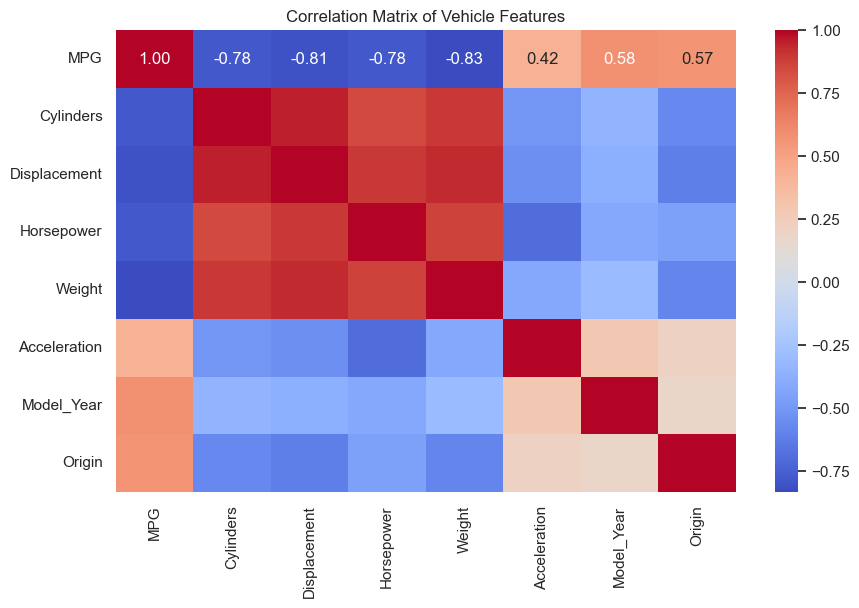

In [82]:
#shows which features are most related to fuel efficiency
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Vehicle Features")
plt.show()

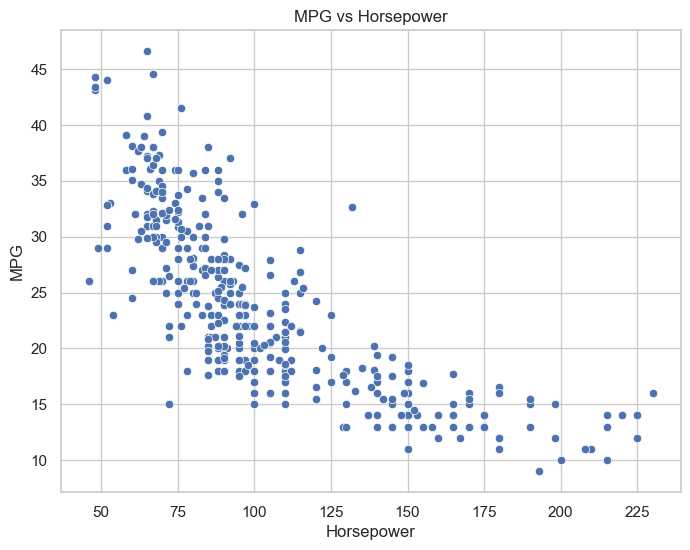

In [84]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Horsepower', y='MPG', data=df)
plt.title("MPG vs Horsepower")
plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.show()
#NOTE: higher horsepower usually means lower MPG

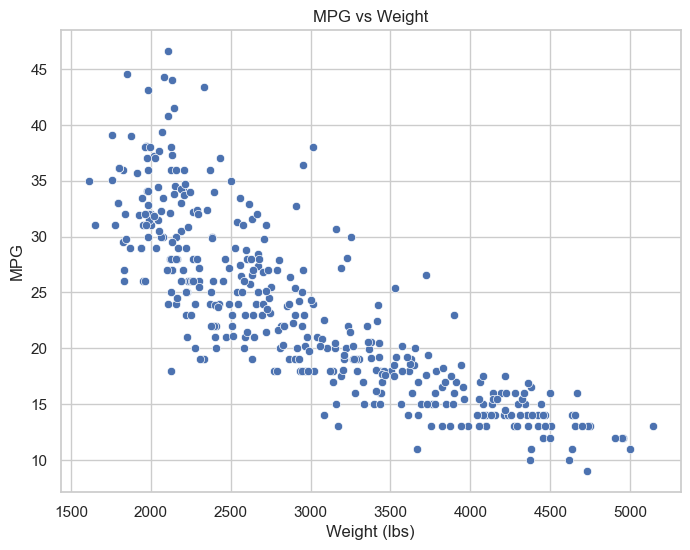

In [86]:
#Heavier cars tend to consume more fuel
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Weight', y='MPG', data=df)
plt.title("MPG vs Weight")
plt.xlabel("Weight (lbs)")
plt.ylabel("MPG")
plt.show()

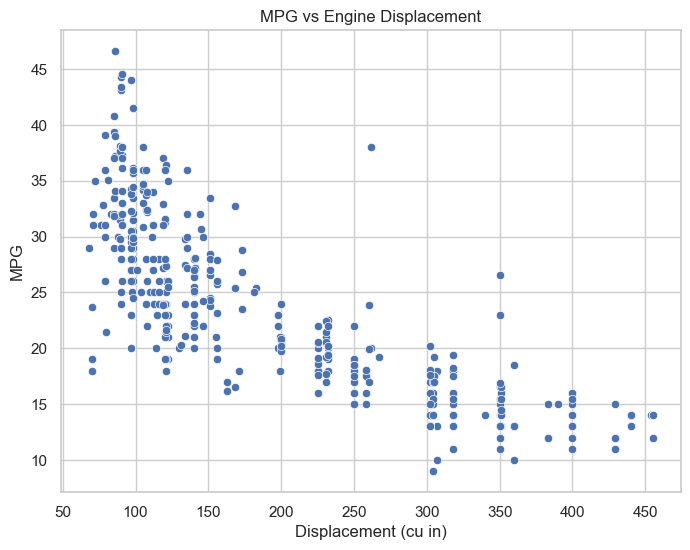

In [88]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Displacement', y='MPG', data=df)
plt.title("MPG vs Engine Displacement")
plt.xlabel("Displacement (cu in)")
plt.ylabel("MPG")
plt.show()

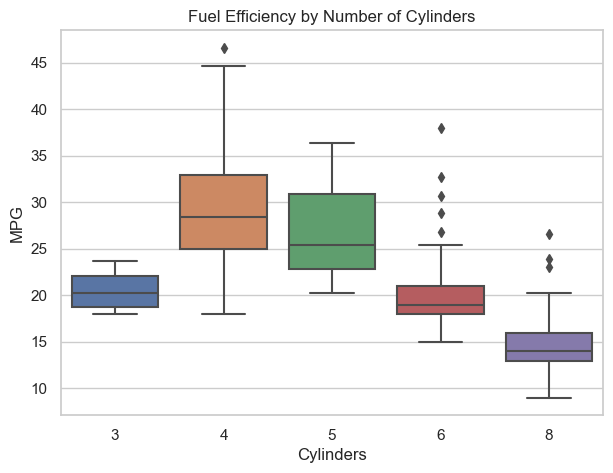

In [90]:
plt.figure(figsize=(7, 5))
sns.boxplot(x='Cylinders', y='MPG', data=df)
plt.title("Fuel Efficiency by Number of Cylinders")
plt.show()


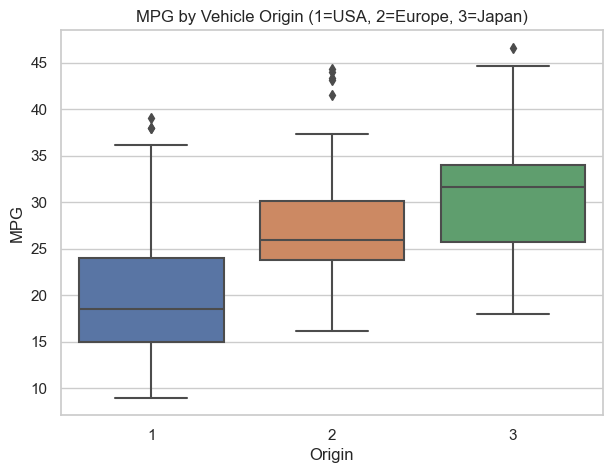

In [92]:
plt.figure(figsize=(7, 5))
sns.boxplot(x='Origin', y='MPG', data=df)
plt.title("MPG by Vehicle Origin (1=USA, 2=Europe, 3=Japan)")
plt.show()


C:\Users\billu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\billu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


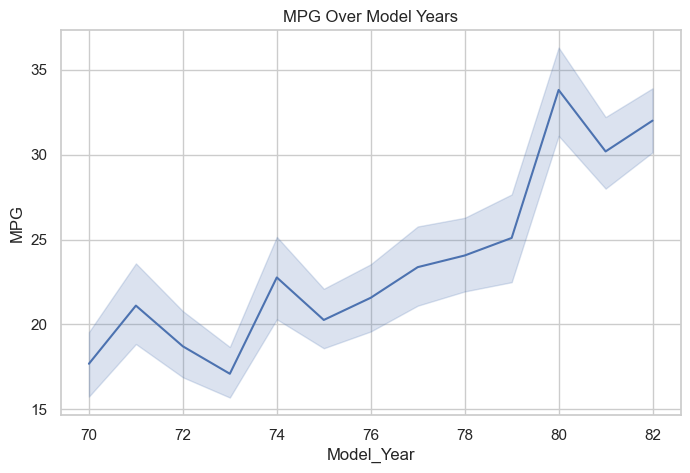

In [94]:
plt.figure(figsize=(8, 5))
sns.lineplot(x='Model_Year', y='MPG', data=df)
plt.title("MPG Over Model Years")
plt.show()

## Brand Level Analysis

In [97]:
# Extract brand name (first word of car name)
df['Brand'] = df['car name'].apply(lambda x: x.split()[0].lower())

# Preview the most common brands
print(df['Brand'].value_counts().head(10))

Brand
ford          48
chevrolet     43
plymouth      31
dodge         28
amc           27
toyota        25
datsun        23
buick         17
pontiac       16
volkswagen    15
Name: count, dtype: int64


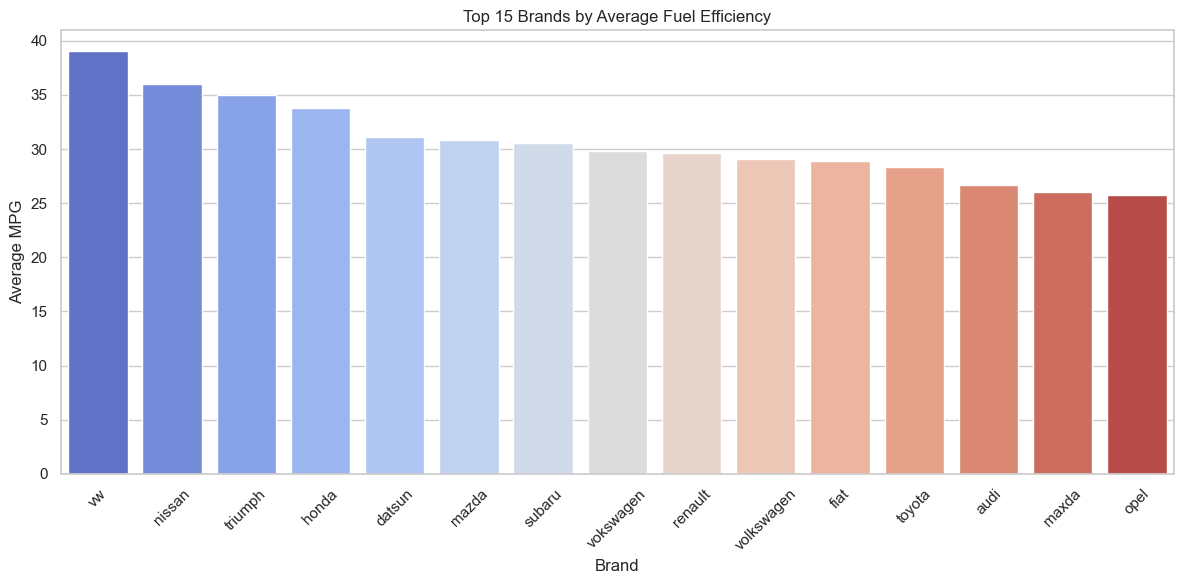

In [102]:
brand_mpg = df.groupby('Brand')['MPG'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=brand_mpg.index[:15], y=brand_mpg.values[:15], palette='coolwarm')
plt.xticks(rotation=45)
plt.ylabel("Average MPG")
plt.title("Top 15 Brands by Average Fuel Efficiency")
plt.tight_layout()
plt.show()

C:\Users\billu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\billu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


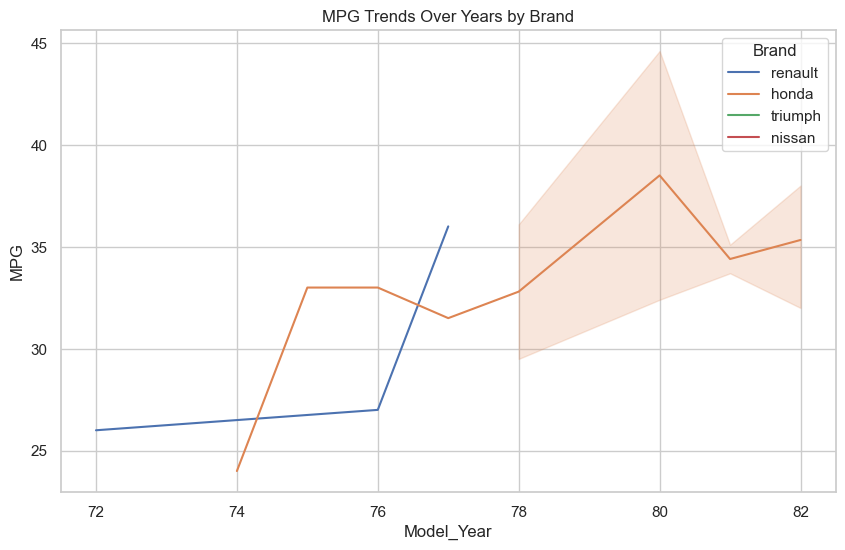

In [106]:
# Example: track fuel efficiency of selected brands
selected_brands = ['VW', 'nissan', 'triumph', 'honda', 'renault']
df_filtered = df[df['Brand'].isin(selected_brands)]

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_filtered, x='Model_Year', y='MPG', hue='Brand')
plt.title("MPG Trends Over Years by Brand")
plt.show()


In [108]:
#csv file for visualization dashboard
df.to_csv("auto_mpg_cleaned.csv", index=False)

In [ ]:
#Auto MPG Data Insights with SQL & Python
#Brand Fuel Efficiency Explorer (1970–1982)
#Automotive Data Analytics Project